<a href="https://colab.research.google.com/github/Bayrem-ben/Bayrem-ben.github.io/blob/master/defect_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import cv2
import imutils
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab.patches import cv2_imshow

In [7]:
imageDir_conforme = os.path.join('/content/drive/My Drive/','draimer/')
imageDir_non_conforme = os.path.join('/content/drive/My Drive/', 'draimer défaut/')

In [ ]:
#verification
for dirname, _, filenames in os.walk(imageDir_conforme):
    for filename in filenames:
        print(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk(imageDir_non_conforme):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
"""
train_image_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, 
                                           rotation_range=20, horizontal_flip=True)

data_conf = train_image_generator.flow_from_directory(batch_size=32,
                                                     directory=imageDir_conforme,
                                                     target_size=(224, 224),
                                                     class_mode='binary')

data_nconf = train_image_generator.flow_from_directory(batch_size=32,
                                                     directory=imageDir_non_conforme,
                                                     target_size=(224, 224),
                                                     class_mode='binary')

with open('/content/gdrive/My Drive/file.txt', 'w') as f:
  f.write('content')

"""

In [42]:
from PIL import Image
from imutils import face_utils

def countour_img(path):
  l = []
  cnt_list = []
  dim = (224, 224)

  for fname in os.listdir(path):
        fpath = os.path.join(path, fname)
        image = cv2.imread(fpath)
        image = cv2.resize(image, dim, Image.ANTIALIAS)

        #gray image conversion
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #applying edge detection
        edged = cv2.Canny(gray , 50, 255)
        #threshholding
        thresh=cv2.threshold(edged,50,255,cv2.THRESH_BINARY_INV)[1]
        #cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cv2.findContours(thresh.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #RETR_LIST #contours, _ 
        #clean concour
        cnts = imutils.grab_contours(cnts)
        image = cv2.drawContours(image, cnts, -1, (0, 255, 0), -1) 

        l.append(image)        
  return l

data1 = countour_img(imageDir_conforme)
data2 = countour_img(imageDir_non_conforme)
#for i in data2 :
    #data1.append(i)
img_tr = data1 + data2
img_train = np.asarray(img_tr)
print(img_train.shape)
#non_defect_images = np.concatenate((non_defect_images1, non_defect_images2))

a = data1.copy()
for n, i in enumerate(a):
  a[n] = 0

b = data2.copy()
for n, i in enumerate(b):
  b[n] = 1
lab_tr = a + b
lab_train = np.asarray(lab_tr)
print(len(lab_train))

(184, 224, 224, 3)
184


184


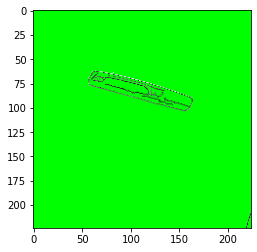

In [51]:
i = 52

print(len(img_train))
plt.imshow(img_train[i])

In [37]:
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, LSTM


def create_model(image_shape=(256, 4096, 1), print_summary=False):
    # Initial model
    model = models.Sequential()

 
    model.add(layers.Flatten())
 
    # Fully connected layer -> nn layer with 64 nodes
    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.25))
    # Fully connected layer -> nn layer with 64 nodes
    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.25))
 
    # Output layer
    model.add(layers.Dense(1, activation="sigmoid"))
 
    # Set model compiler
    model.compile(optimizer="SGD", loss="binary_crossentropy", metrics=["acc"])
    
    return model
model = create_model()
"""
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))

model.add(Dense(units=8000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=400,activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
"""

"\nmodel = Sequential()\nmodel.add(Embedding(10000, 32))\nmodel.add(SimpleRNN(32))\n\nmodel.add(Dense(units=8000,activation='relu'))\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(units=4000,activation='relu'))\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(units=1000,activation='relu'))\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(units=400,activation='relu'))\nmodel.add(Dropout(0.5))\n\n# Output layer\nmodel.add(Dense(1, activation='sigmoid'))\n\nmodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])\nmodel.summary()\n"

In [25]:
model1 = tf.keras.models.Sequential([
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(512,activation=tf.nn.relu),
         tf.keras.layers.Dropout(0.2),
         tf.keras.layers.Dense(3,activation=tf.nn.softmax)])

optimiser = tf.keras.optimizers.Adam()
model1.compile(optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [46]:
#X_train, X_test, y_train, y_test = train_test_split(img_train, lab_train, test_size=0.15, random_state=20, shuffle=True)

history = model1.fit(img_train, lab_train, epochs=15, batch_size=16, validation_split=0.2, shuffle=True)

Epoch 1/15
10/10 [==============================] - 3s 350ms/step - loss: 2.5923e-04 - acc: 1.0000 - val_loss: 0.0563 - val_acc: 0.9730
Epoch 2/15
10/10 [==============================] - 3s 345ms/step - loss: 0.1102 - acc: 0.9796 - val_loss: 1.1301 - val_acc: 0.8919
Epoch 3/15
10/10 [==============================] - 3s 348ms/step - loss: 0.0960 - acc: 0.9864 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/15
10/10 [==============================] - 3s 350ms/step - loss: 0.1627 - acc: 0.9796 - val_loss: 4.2494 - val_acc: 0.6216
Epoch 5/15
10/10 [==============================] - 3s 345ms/step - loss: 0.3119 - acc: 0.9524 - val_loss: 2.4568 - val_acc: 0.5676
Epoch 6/15
10/10 [==============================] - 3s 346ms/step - loss: 0.1977 - acc: 0.9728 - val_loss: 0.0122 - val_acc: 1.0000
Epoch 7/15
10/10 [==============================] - 3s 342ms/step - loss: 0.0759 - acc: 0.9796 - val_loss: 0.6472 - val_acc: 0.7568
Epoch 8/15
10/10 [==============================] - 3s 340ms/step - 

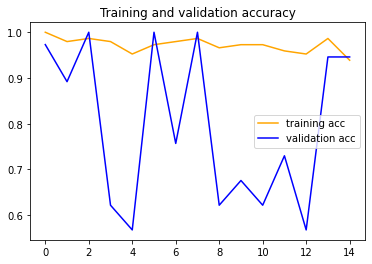

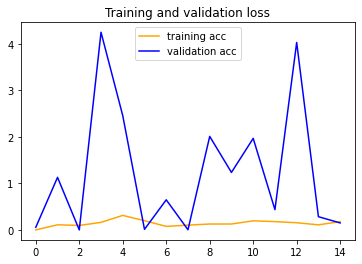

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, 
                                           rotation_range=20, horizontal_flip=True)

data_conf = train_image_generator.flow_from_directory(batch_size=32,
                                                     directory=img_train,
                                                     target_size=(224, 224),
                                                     class_mode='binary')